<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/Medical_Cost_SOLO_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://accessiahealth.org/app/uploads/2024/06/iStock-1351105760.jpg)

## Introduction

Healthcare costs continue to pose one of the most significant economic pressures on individuals, insurers, and society at large. Using the Insurance dataset — which captures personal attributes including age, sex, body mass index (BMI), number of children, smoking status, region, and the actual medical insurance charges billed — this project aims to build a predictive model for insurance cost (“charges”).

By leveraging machine learning (or regression) techniques, the goal is two-fold: (1) understand which factors most strongly drive increasing medical insurance costs, and (2) provide a reliable cost-estimation tool that stakeholders (insurers, policy makers, individuals) can use for decision-making. Through data cleaning, exploratory data analysis, feature engineering, model selection, and evaluation, this work transforms raw variables into actionable insights about the financial risk embedded in health insurance.

## 1- Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score



## 2- Load Dataset

In [2]:
df=pd.read_csv("https://drive.google.com/uc?id=1OC73ZCgCIFavgGs8yjfpHI4JwwYE_Mt4")

## 3- Analyzing the Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## 4- EDA

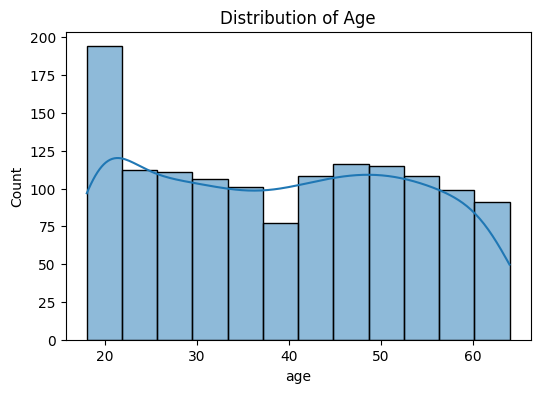

In [6]:
plt.figure(figsize=(6,4))
sns.histplot(x="age",data=df,kde=True,)
plt.title('Distribution of Age')
plt.show()

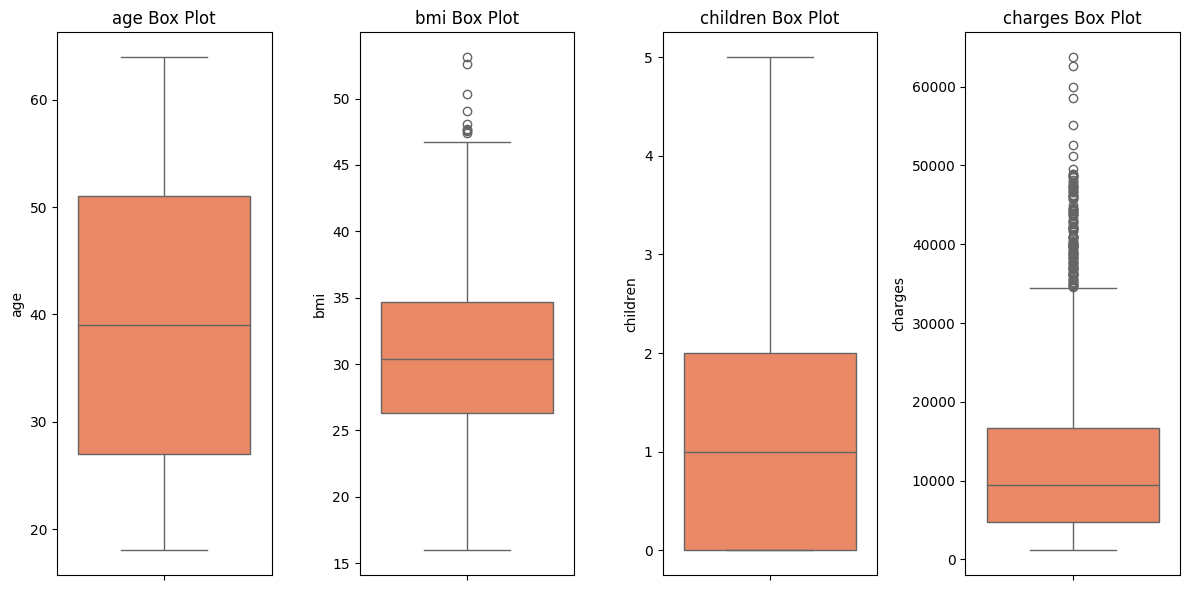

In [7]:
plt.figure(figsize=(12, 6))
num_vars = ['age', 'bmi', 'children', 'charges']
for i, var in enumerate(num_vars, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df[var], color='coral')
    plt.title(f'{var} Box Plot')
plt.tight_layout()
plt.show()

In [8]:
le=LabelEncoder()
cols_to_encode = ["sex", "smoker", "region"]

for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])

We are transforming our object data to numerical with Label Encoder

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
numeric = df.select_dtypes(include=np.number)
plt.figure(figsize=(10,8))
sns.heatmap(numeric.corr(), annot=True, fmt=".2f", cmap='viridis', center=0)
plt.title('Correlation heatmap of numeric features')
plt.show()

In [ ]:
df=df.drop(columns="region")

In [ ]:
df.head()

## 5- Seperate target and features

In [ ]:
x=df.drop(columns="charges")
y=df["charges"]

In [ ]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

## 6- Linear Regression Model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test,y_test)

In [ ]:
y_pred = model.predict(x_test)

# (R2 ve MSE)
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


In [ ]:
scores = cross_val_score(model, x, y, cv=5, scoring='r2')
print("Cross Validation Scores: ",scores)
print("Mean Score:", scores.mean())

## Conclusion

The modelling exercise revealed several illuminating patterns in the determinants of individual insurance charges. Key drivers — such as smoker status, BMI, and age — consistently emerged as strong predictors of higher costs. For example, smokers incur markedly higher charges compared to non-smokers, emphasising the premium impact of lifestyle choices.
Nonetheless, the model also highlights that certain variables (such as region or number of children) contribute less than might be expected, suggesting that cost predictions cannot rely purely on demographic segmentation. Moreover, while the model achieved respectable performance, it also indicates that a sizeable portion of variance remains unaccounted for — underlining the complexity and individualized nature of healthcare expenses.
Ultimately, this model serves as a valuable decision-support tool but should be used with consideration of its limitations. For future work, integrating longitudinal data, negotiated insurance claims, policy details or non-linear interaction effects could enhance predictive accuracy and yield deeper risk insights